# Figure Three: MHD Model Results

- Top Panels: comparison of radial cuts of modeled observables with in-situ measurements
    - velocity
    - density
    - radial magnetic field
- Bottom Panel: comparison of MHD and PFSS footpoints
    - longitude vs. latitude plot
    - correlation plot

## Imports

In [2]:
import sys, os
import astropy.units as u

import datetime
import numpy as np
import pandas as pd
import scipy.constants as con
from scipy import stats
import scipy.stats as stats
from scipy.interpolate import interp1d
from pandas.tseries.frequencies import to_offset

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


import sunpy
import astrospice
from astropy.time import Time
from pyspedas import time_string

import tools.utilities as utils
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs
from mhd.psipy.model import MASOutput


for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol='lavender'
scol = 'violet'
hcol = 'lightblue'
pcol = 'lightgreen'
aa = 0.6
lw=2
clon = c[0]
clat = c[1]
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring'] # velocity, density, magnetic field

# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'


# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 16})
plt.style.use(plot_style)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

02-Aug-23 15:14:11: /Users/tamarervin/miniconda3/envs/e11_conjunction/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [3]:
# regular data
parker = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parker.csv')
orbiter = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiter.csv')
abun = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abun.csv')
smag = pd.read_csv('/Users/tamarervin/e11_conjunction/results/solo_mag.csv')
merged_df = pd.read_csv('/Users/tamarervin/e11_conjunction/results/merged_df.csv')
pss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/pss.csv')

# timesampled data
parkerdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownt.csv')
orbiterdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownt.csv')
abundownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownt.csv')
smagdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownt.csv')

# longitudinally sampled data
parkerdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownl.csv')
orbiterdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownl.csv')
abundownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownl.csv')
smagdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownl.csv')

# PFSS/MHD data
tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/mhd_footpoints.dat', sep='\s+') 
so_tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/so_mhd_footpoints.dat', sep='\s+')
pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/psp_pfss.csv')
so_pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/so_pfss.csv')

# FIX TIMESTAMPS
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parker.Time]
orbiter['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in orbiter.Time]
pss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pss.Time]
smag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in smag.Time]
abun['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in abun.Time]
so_pfss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in so_pfss.times]
parkerdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parkerdownt.Time]
orbiterdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiterdownt.Time]
smagdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in smagdownt.Time]
abundownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in abundownt.Time]


## MHD Plot

In [4]:
# read in mhd data
corona_model = MASOutput("mhd/hmi_02_24_2022/") 
cbr=corona_model['br']
cbt=corona_model['bp']
cbn=corona_model['bt']
crho = corona_model['rho']
cvr = corona_model['vr']
cvt = corona_model['vp']
cvn = corona_model['vt']
cp = corona_model['p']
cjr = corona_model['jr']
cjt = corona_model['jp']
cjn = corona_model['jt']

In [ ]:
# resample the coordinates
rad = (pfss.rAU.values*u.AU).to(u.km)
vr_sampled = cvr.sample_at_coords(pfss.lon.values*u.deg, pfss.lat.values*u.deg, rad)
rho_sampled = crho.radial_normalized(2).sample_at_coords(pfss.lon.values*u.deg, pfss.lat.values*u.deg, rad)
br_sampled = cbr.radial_normalized(2).sample_at_coords(pfss.lon.values*u.deg, pfss.lat.values*u.deg, rad)

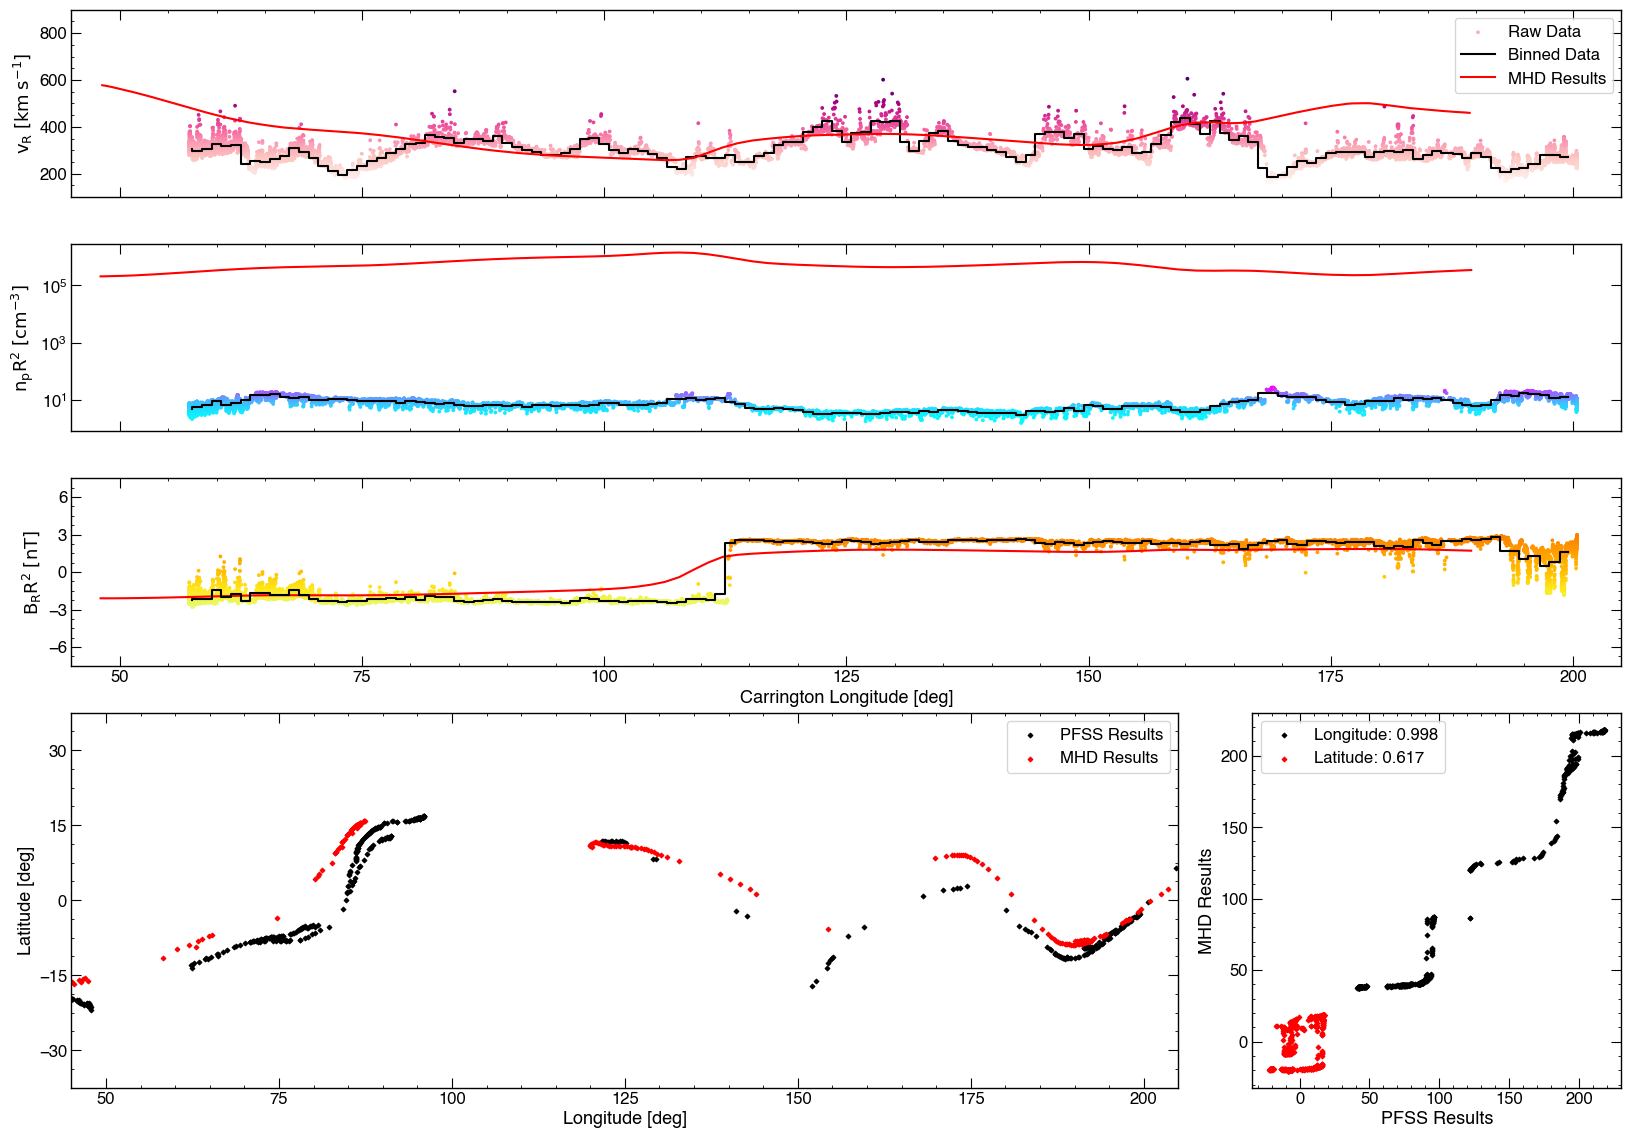

In [21]:
# plot in-situ data against the model
fig = plt.figure(figsize=(20, 14))
grid = plt.GridSpec(4, 2, height_ratios=[1, 1, 1, 2], width_ratios=[3, 1], wspace=0.1, hspace=0.2)

# create plots
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, :])
ax3 = fig.add_subplot(grid[2, :])
ax4 = fig.add_subplot(grid[3, 0])
ax5 = fig.add_subplot(grid[3, 1])

# velocity
ax = ax1

ax.scatter(parker.lon, parker.vr, cmap='RdPu', c=parker.pvel, s=3, label='Raw Data')
ax.step(parkerdownl.lon, parkerdownl.vr, color='black', label='Binned Data')
ax.plot(pfss.lon, vr_sampled, color='red', label='MHD Results')
ax.set(ylabel=r'$\rm v_R \; [km \; s^{-1}]$', ylim=(100, 900), yticks=np.arange(200, 801, step=200))
ax.set_xticklabels([])
ax.legend()

# density
ax = ax2
ax.plot(pfss.lon, rho_sampled, color='red')
ax.scatter(parker.lon, parker.pdens, cmap='cool', c=parker.pdens, s=3)
ax.step(parkerdownl.lon, parkerdownl.pdens, color='black')
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set(ylabel=r'$\rm n_p R^2 \; [cm^{-3}]$')

# magnetic field
ax = ax3
ax.plot(pfss.lon, br_sampled*2, color='red')
im = ax.scatter(parker.lon, parker.BrR2, cmap='Wistia', c=parker.BrR2, s=3)
ax.step(parkerdownl.lon, parkerdownl.BrR2, color='black')
ax.set(xlabel='Carrington Longitude [deg]', ylabel=r'$\rm B_R R^2 \; [nT]$', ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))

# scatter plot
mlat = 90 - tracerdf.t*u.rad.to(u.deg)
# ax4.set_title('Parker Modeling Results')
ax4.scatter(pfss.flon, pfss.flat, c='black', s=5, label='PFSS Results', marker='D')
ax4.scatter(tracerdf.p*u.rad.to(u.deg), mlat, c='red', s=5, label='MHD Results', marker='D')
ax4.set_xlabel('Longitude [deg]')
ax4.set_ylabel('Latitude [deg]')
ax4.legend()
ax4.set(ylim=(-37.5, 37.5), yticks=np.arange(-30, 31, step=15))

# PARKER
mlat = 90 - tracerdf.t*u.rad.to(u.deg)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
corr = stats.spearmanr(pfss.flon, tracerdf.p*u.rad.to(u.deg))
corr2 = stats.spearmanr(pfss.flat, mlat)
ax5.scatter(pfss.flon, tracerdf.p*u.rad.to(u.deg), color='black', label='Longitude: ' + str(np.round(corr[0], 3)), s=5, marker='D')
ax5.scatter(pfss.flat, mlat, color='red', label='Latitude: ' + str(np.round(corr2[0], 3)), s=5, marker='D')
ax5.set_xlabel('PFSS Results')
ax5.set_ylabel('MHD Results')
ax5.legend()

for ax in [ax1, ax2, ax3, ax4]:
    ax.set(xlim=(45, 205), xticks=np.arange(50, 205, step=25))

plt.savefig('figures/mhd_comp.png')

## MHD Appendix Figure
- three panels: radial cut of MHD observables compared with in-situ measurements
    - left: radial velocity vs. PSP velocity
    - middle: scaled density vs. PSP scaled density
    - right: scaled radial field vs. SWA/HIS carbon charge state ratio

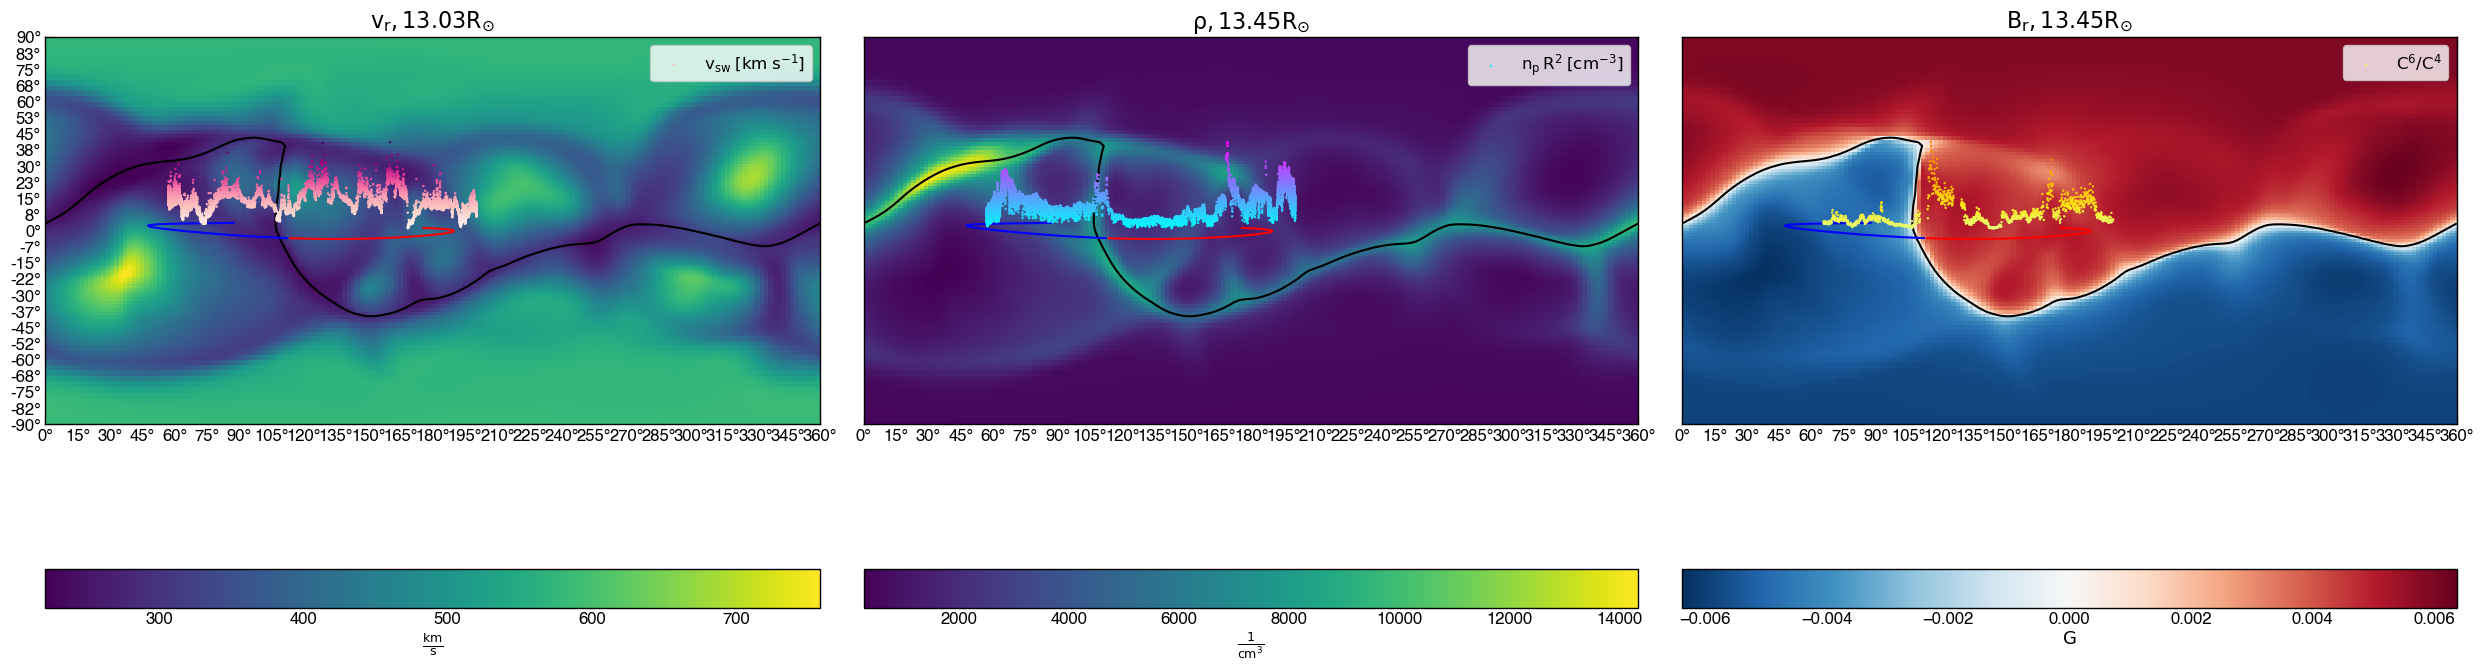

In [29]:
fig, axs = plt.subplots(1, 3, sharey='all', tight_layout=True, figsize=[25, 10])
cbar_kwargs = {"orientation": "horizontal"}
r_idx = -18
import astropy.units as u
var = ["vr", "rho", "br"]
titles = [r'$\rm v_r, 13.03 R_{\odot}$', r'$\rm \rho, 13.45 R_{\odot}$', r'$\rm B_r, 13.45 R_{\odot}$']
# find lowest lat value
lat_low = np.min(np.deg2rad(pfss.lat))
# vlow = np.min(np.deg2rad(spi_df.psp_vel))
# polarities
neg = np.where(pfss.lon <= 113)[0]
pos = np.where(pfss.lon > 113)[0]

for i in range(0, 3):
    ax = axs[i]
    corona_model[var[i]].plot_radial_cut(r_idx, ax=ax, cbar_kwargs=cbar_kwargs)
    corona_model["br"].contour_radial_cut(r_idx, levels=[0], ax=ax, colors="black", zorder=1)
    ax.plot(np.deg2rad(pfss.lon[neg]), np.deg2rad(pfss.lat[neg]), color='blue', zorder=2)
    ax.plot(np.deg2rad(pfss.lon[pos]), np.deg2rad(pfss.lat[pos]), color='red', zorder=2)
    # ax.set_xticks(np.deg2rad([0, 60, 120, 180, 240, 300, 360]))
    # ax.set_yticks(np.deg2rad([-90, -45, 0, 45, 90]))
    # ax.set_xticklabels([r'$\rm 0^{\circ}$', r'$\rm 60^{\circ}$', r'$\rm 120^{\circ}$', r'$\rm 180^{\circ}$',
    #                      r'$\rm 240^{\circ}$', r'$\rm 300^{\circ}$', r'$\rm 360^{\circ}$'])
    # ax.set_yticklabels([r'$\rm -90^{\circ}$', r'$\rm -45^{\circ}$', r'$\rm 0^{\circ}$', 
    #                      r'$\rm 45^{\circ}$', r'$\rm 90^{\circ}$'])
    ax.set_title(titles[i])

# plot the data
ssize = 0.5
zord = 5
# velocity 
ax = axs[0]
vel = utils.renormalize_data(np.deg2rad(parker.vr), lat_low + np.deg2rad(5), lat_low + np.deg2rad(45))
axs[0].scatter(np.deg2rad(parker.lon), vel, c = vel, cmap='RdPu', s=ssize, zorder=zord, label=r'$\rm v_{sw} \; [km \; s^{-1}]$')
# ax.set_xticklabels([r'$\rm 0^{\circ}$', r'$\rm 60^{\circ}$', r'$\rm 120^{\circ}$', r'$\rm 180^{\circ}$',
#                          r'$\rm 240^{\circ}$', r'$\rm 300^{\circ}$', r'$\rm 360^{\circ}$'])
# ax.set_yticklabels([r'$\rm -90^{\circ}$', r'$\rm -45^{\circ}$', r'$\rm 0^{\circ}$', 
#                          r'$\rm 45^{\circ}$', r'$\rm 90^{\circ}$'])
axs[0].legend(loc='upper right')

# density
ax = axs[1]
rho = utils.renormalize_data(np.deg2rad(parker.pdens), lat_low + np.deg2rad(5), lat_low + np.deg2rad(45))
axs[1].scatter(np.deg2rad(parker.lon), rho, c = rho, cmap='cool', s=ssize, zorder=zord, label=r'$\rm n_p\, R^2 \; [cm^{-3}]$')
# ax.set_xticklabels([r'$\rm 0^{\circ}$', r'$\rm 60^{\circ}$', r'$\rm 120^{\circ}$', r'$\rm 180^{\circ}$',
#                          r'$\rm 240^{\circ}$', r'$\rm 300^{\circ}$', r'$\rm 360^{\circ}$'])
# ax.set_yticklabels([r'$\rm -90^{\circ}$', r'$\rm -45^{\circ}$', r'$\rm 0^{\circ}$', 
#                          r'$\rm 45^{\circ}$', r'$\rm 90^{\circ}$'])
axs[1].legend(loc='upper right')

# magnetic field
ax = axs[2]
car = utils.renormalize_data(np.deg2rad(abun.car), lat_low + np.deg2rad(5), lat_low + np.deg2rad(45))
axs[2].scatter(np.deg2rad(abun.lon)[630:], car[630:], c=car[630:], cmap='Wistia', s=ssize, zorder=zord, label = r'$\rm C^6/C^4$')
# ax.set_xticklabels([r'$\rm 0^{\circ}$', r'$\rm 60^{\circ}$', r'$\rm 120^{\circ}$', r'$\rm 180^{\circ}$',
#                          r'$\rm 240^{\circ}$', r'$\rm 300^{\circ}$', r'$\rm 360^{\circ}$'])
# ax.set_yticklabels([r'$\rm -90^{\circ}$', r'$\rm -45^{\circ}$', r'$\rm 0^{\circ}$', 
#                          r'$\rm 45^{\circ}$', r'$\rm 90^{\circ}$'])
legend = axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()